In [124]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

<h2>Data Preparation</h2>

In [125]:
# Read crypto_data.csv into Pandas
file_path = Path("Resources/crypto_data.csv")
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [126]:
df.shape

(1252, 7)

In [127]:
# Discard all cryptocurrencies that are not being traded, then drop the IsTrading column.
# Also removing the Unamed: 0 column...
df_Trading = df.loc[df['IsTrading']==True].drop(['Unnamed: 0','IsTrading'], axis=1)
df_Trading.head()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365Coin,X11,PoW/PoS,NaN,2300000000
2,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,SixEleven,SHA-256,PoW,NaN,611000
4,808,SHA-256,PoW/PoS,0.000000e+00,0


In [128]:
df_Trading.shape

(1144, 5)

In [129]:
# Remove all rows that have at least one null value
df_TradingNoNulls = df_Trading.dropna()
df_TradingNoNulls.shape

(685, 5)

In [130]:
# Filter for cryptocurrencies that have been mined
df_Mined = df_TradingNoNulls.loc[df_TradingNoNulls['TotalCoinsMined'] > 0]
df_Mined.shape

(532, 5)

In [131]:
# Save the coin name for labeling later maybe...
coinName = df_Mined['CoinName']
coinName

0           42 Coin
2           404Coin
5         EliteCoin
7           Bitcoin
8          Ethereum
           ...     
1238         ZEPHYR
1242        Gapcoin
1245         Beldex
1246        Horizen
1247    BitcoinPlus
Name: CoinName, Length: 532, dtype: object

In [132]:
# Since the coin names do not contribute to the analysis of the data, delete the CoinName from the original dataframe
df_Mined = df_Mined.drop('CoinName', axis=1)
df_Mined.shape

(532, 4)

In [133]:
df_Mined.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0


In [134]:
# Convert the remaining features with text values, Algorithm and ProofType, into numerical data 
# To accomplish this task, use Pandas to create dummy variables
df_Converted = pd.get_dummies(df_Mined, columns=['Algorithm', 'ProofType'])
df_Converted.head()



,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# Standardize dataset so that columns that contain larger values do not unduly influence the outcome
crypto_scaled = StandardScaler().fit_transform(df_Converted)
print(crypto_scaled[0:2])

[[-0.11710817 -0.1528703  -0.0433963  -0.0433963  -0.0433963  -0.06142951
  -0.07530656 -0.0433963  -0.06142951 -0.06142951 -0.0433963  -0.0433963
  -0.19245009 -0.06142951 -0.09740465 -0.0433963  -0.11547005 -0.07530656
  -0.0433963  -0.0433963  -0.15191091 -0.0433963  -0.13118084 -0.0433963
  -0.0433963  -0.08703883 -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.06142951 -0.0433963  -0.08703883 -0.08703883 -0.08703883 -0.0433963
  -0.13118084 -0.13840913 -0.13840913 -0.0433963  -0.06142951 -0.0433963
  -0.07530656 -0.18168574 -0.0433963  -0.0433963  -0.0433963  -0.07530656
  -0.15826614 -0.31491833 -0.0433963  -0.08703883 -0.07530656 -0.06142951
   1.38675049 -0.0433963  -0.0433963  -0.06142951 -0.0433963  -0.0433963
  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963  -0.0433963
  -0.39879994 -0.0433963  -0.18168574 -0.0433963  -0.08703883 -0.08703883
  -0.10680283 -0.0433963  -0.13118084 -0.0433963  -0.0433963  -0.0433963
  -0.0433963  -0.07530656 -0.43911856 -0.04339

<h2>Dimensionality Reduction</h2>

In [136]:
# Preserve 90% of the explained variance in dimensionality reduction. 

# Initialize PCA model
pca = PCA(n_components=0.90)

# Get principal components
crypto_pca = pca.fit_transform(crypto_scaled)

In [137]:
# How did the number of the features change?
df_crypto_pca = pd.DataFrame(
    data=crypto_pca,
    index=df_Mined.index
)
df_crypto_pca.head()

# The number of features was reduced from 98 to 74

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.734816e-12,-5.417255e-15,-1.223976e-16,-0.007129,-1.319756,-0.051813,...,7.930746e-17,1.066184e-15,2.929092e-15,-7.260564e-16,-1.958946e-15,1.858141e-15,-1.863509e-15,7.873066e-16,-1.846167e-18,-4.153611e-15
2,-0.318434,1.032331,-0.591126,0.001386,2.712386e-12,-5.575109e-15,-2.141355e-16,-0.007739,-1.322514,-0.056674,...,5.236227e-17,3.558103e-16,3.123007e-15,-5.243003e-17,-1.703046e-15,1.069014e-15,-1.856951e-15,1.174094e-15,5.251165e-16,-3.804973e-15
5,2.305468,1.656383,-0.683617,0.004731,9.322259e-12,-6.700325e-15,7.872127e-15,-0.054781,-1.542879,-0.943951,...,3.638111e-14,-1.841986e-14,-5.521324e-14,-7.303804e-14,2.329683e-14,-3.527460e-14,3.114482e-14,2.752079e-14,-2.364644e-14,2.844002e-14
7,-0.145184,-1.320593,0.192813,-0.001229,-2.420624e-12,2.357806e-15,-1.697979e-15,-0.002071,0.281463,0.251862,...,4.765898e-15,2.352318e-17,-2.522688e-14,6.604406e-15,-9.542520e-15,-1.391009e-14,2.591484e-15,2.225494e-15,4.614234e-15,4.660314e-15
8,-0.151768,-2.036192,0.396182,-0.001705,-3.352037e-12,2.706411e-15,-1.587523e-15,0.027735,0.519099,0.188820,...,-3.035501e-14,6.137487e-14,-3.172419e-14,-3.873903e-14,-7.522860e-14,-7.057959e-14,4.784940e-14,9.436182e-15,1.251016e-13,-3.544121e-15


<h3>How did the number of the features change?</h3>

<i>The number of features was reduced from 98 to 74</i>

In [138]:
# Fetch the explained variance 
print(f'With a feature reduction from 98 to 74, the explained variance is: {round(pca.explained_variance_ratio_.cumsum()[73],2)*100}%')

With a feature reduction from 98 to 74, the explained variance is: 90.0%


In [142]:
# Further reduce the dataset dimensions with t-SNE and visually inspect the results. 

# Initialize t-SNE model
tsne = TSNE(learning_rate=200)

# Reduce dimensions
tsne_crypto_features = tsne.fit_transform(crypto_pca)

tsne_crypto_features.shape


(532, 2)

In [144]:
df_crypto_pca['x'] = tsne_crypto_features[:,0]
df_crypto_pca['y'] = tsne_crypto_features[:,1]

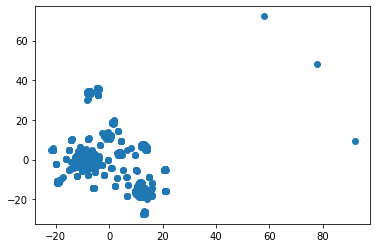

In [145]:
# Visualize the clusters
plt.scatter(df_crypto_pca['x'], df_crypto_pca['y'])
plt.title('T-SNE Crypto Clusters')
plt.show()